In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [36]:
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]


data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [37]:
X_train[:,0].shape

(784,)

In [49]:
# def init_params():
#     W1 = np.random.rand(10,784) - 0.5 # generates values between -0.5 to 0.5
# #     W1 = np.random.rand(10,784) - 0.5 equiavlent to above line
#     b1 = np.random.rand(10,1) - 0.5
#     W2 = np.random.rand(10,10)  - 0.5# generates values between -0.5 to 0.5
#     b2 = np.random.rand(10,1) - 0.5
#     return W1,b1,W2,b2

def init_params(input_size = 784, hidden_size = 10, output_size = 10):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * np.sqrt(2. / input_size)
    b1 = np.random.randn(hidden_size, 1)
    W2 = np.random.randn(output_size, hidden_size) * np.sqrt(2. / hidden_size)
    b2 = np.random.randn(output_size, 1)
    return W1, b1, W2, b2


def Relu(Z):
    return np.maximum(0,Z)

# def softmax(Z):
#     return np.exp(Z)/np.sum(np.exp(Z))

def softmax(Z):
    Z_exp = np.exp(Z - np.max(Z,axis = 0,keepdims = True))
    return Z_exp / np.sum(Z_exp, axis=0,keepdims = True)


def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = Relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2


# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size,Y.max()+1))
#     one_hot_Y[np.arange(Y.size,Y)].any() == 1
#     one_hot_Y = one_hot_Y.T
#     return one_hot_Y

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def deriv_Reluz(Z):
        return Z>0

def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m*np.sum(dZ2,axis = 1,keepdims = True)
    dZ1 =  W2.T.dot(dZ2) * deriv_Reluz(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1,axis = 1,keepdims = True)
    return dW1,db1,dW2,db2


def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha*dW1
    W2 = W2 - alpha*dW2
    b1 = b1 - alpha*db1
    b2 = b2 - alpha*np.reshape(db2, (10,1))
    return W1,b1,W2,b2


In [50]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(prediction,Y):
    print(prediction,Y)
    return np.sum(prediction == Y)/Y.size

def grad_des(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(1,iterations+1):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%50 == 0:
            print("Iteration ", i)
            print(f"Accuracy:{get_accuracy(get_predictions(A2), Y):-4f}")
            
    return W1,b1,W2,b2

In [52]:
W1,b1,W2,b2 = grad_des(X_train,Y_train,100,0.20)

Iteration  50
[7 7 7 ... 7 7 7] [9 9 0 ... 4 4 9]
Accuracy:0.104854
Iteration  100
[7 7 7 ... 7 7 7] [9 9 0 ... 4 4 9]
Accuracy:0.104854


In [22]:
def make_predictions(X,W1,b1,W2,b2):
    _,_,_,A2 = forward_prop(W1,b1,W2,b2,X)
    predictions = get_predictions(A2)
    return predictions

def test_pred(index,W1,b1,W2,b2):
    current_image = X_train[:,index,None]
    predictions = make_predictions(X_train[:,index,None],W1,b1,W2,b2)
    label = Y_train[index]
    print(f"predcition: {predictions} \n Label: {label}")
    
    current_image = current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image,interpolation = 'nearest')
    plt.show()

predcition: [6] 
 Label: 1


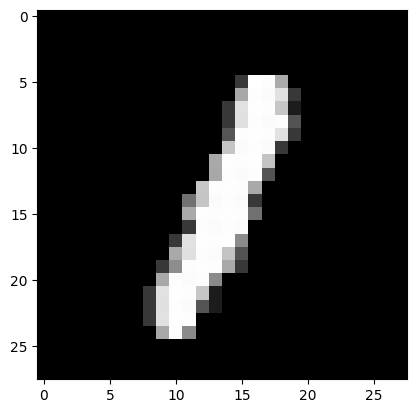

In [26]:
test_pred(100,W1,b1,W2,b2)

In [29]:
dev_predictions = make_predictions(X_dev,W1,b1,W2,b2)
get_accuracy(dev_predictions,Y_dev)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

0.11